<a href="https://colab.research.google.com/github/amitsiwach/Time_series_modelling/blob/main/GARCH(2%2C2)_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import shutup
shutup.please()

## GARCH(2,2) Model


$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [8]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

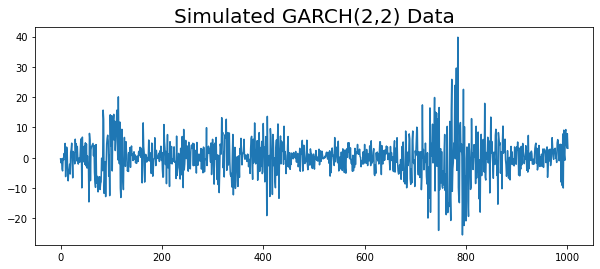

In [9]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)


Text(0.5, 1.0, 'Data Volatility')

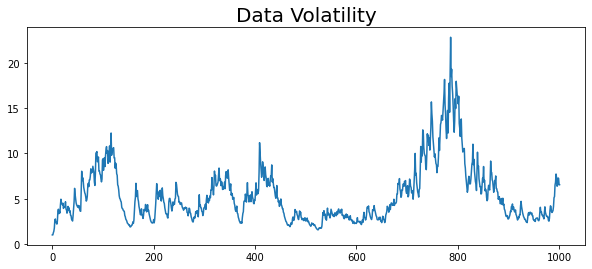

In [10]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

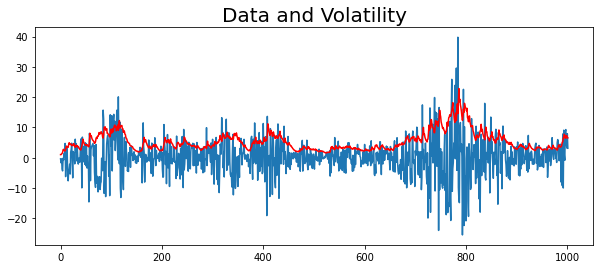

In [11]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

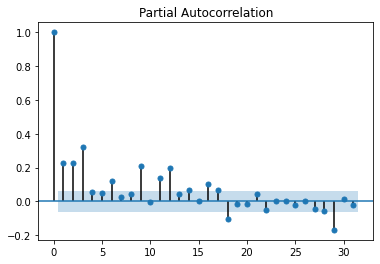

In [12]:
plot_pacf(np.array(series)**2)
plt.show()

In [13]:
train, test = series[:-test_size], series[-test_size:]

In [14]:

model = arch_model(train, p=2, q=2)

In [15]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2016652.0931687716
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1710939.3135055553
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2764.2475848123404
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2763.0614069299854
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2720.518464588599
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2733.8030820953845
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2718.0235423446084
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2717.9935848002724
Iteration:      9,   Func. Count:     72,   Neg. LLF: 2717.9941396187733
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2717.9931724865473
Iteration:     11,   Func. Count:     87,   Neg. LLF: 2717.9930686543375
Iteration:     12,   Func. Count:     93,   Neg. LLF: 2717.993068626418
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2717.9930686543375
            Itera

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2717.99
Distribution:                  Normal   AIC:                           5447.99
Method:            Maximum Likelihood   BIC:                           5476.81
                                        No. Observations:                  902
Date:                Tue, Oct 11 2022   Df Residuals:                      901
Time:                        08:36:28   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0885      0.126      0.702      0.483 [ -0.159,  0.336]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.6702      0.271      2.474  1.335e-02   [  0.139,  1.201]
alpha[1]       0.0933  3.192e-02      2.922  3.473e-03 [3.072e-02,  0.156]
alpha[2]       0.2046  4.633e-02      4.415  1.009e-05   [  0.114,  0.295]
beta[1]        0.2629      0.102      2.584  9.775e-03 [6.346e-02,  0.462]
beta[2]        0.4393  8.061e-02      5.449  5.055e-08   [  0.281,  0.597]
==========================================================================

Covariance estimator: robust
"""

## Predict

In [16]:
predictions = model_fit.forecast(horizon=test_size)

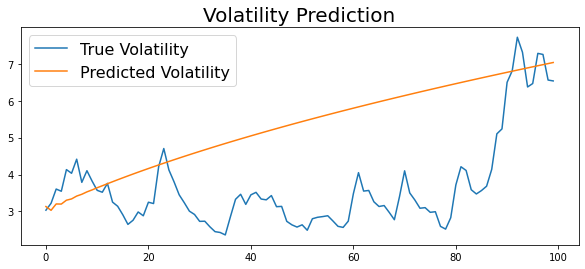

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

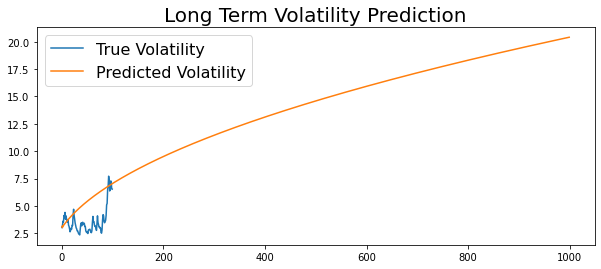

In [18]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast Origin

In [19]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

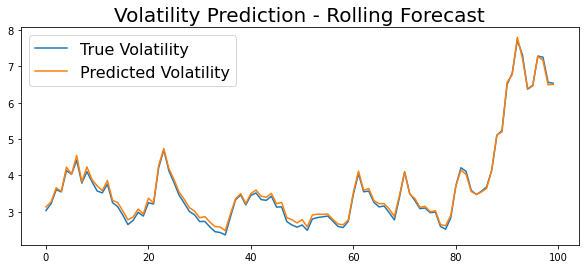

In [20]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [21]:
series = [gauss(0,1), gauss(0,1)]

In [22]:
series

[0.08526690017928117, -0.18654460506297435]